In [165]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

In [166]:
filename = '/Users/forero/Illustris_data/WEB_CIC_256_DM_TNG300-3.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
density_smooth = f['density_smooth'][:,:,:]
lambda1 = f['lambda1'][:,:,:]
lambda2 = f['lambda2'][:,:,:]
lambda3 = f['lambda3'][:,:,:]
f.close()

<KeysViewHDF5 ['density_smooth', 'eigenvector1', 'eigenvector2', 'eigenvector3', 'hessian', 'lambda1', 'lambda2', 'lambda3', 'potential']>


In [63]:
def load_summary(filename):
    dtype=[('FOFID', 'i8'),
           ('MFOF', 'f8'), 
           ('Mstar', 'f8'),
           ('vmax', 'f8'),
           ('x', 'f8'),
           ('y', 'f8'),
           ('z', 'f8'),
           ('vx', 'f8'),
           ('vy', 'f8'),
           ('vz', 'f8')]
    summary = np.loadtxt(filename, dtype=dtype)    
    return summary

In [169]:
BoxSize = 205000.0
delta_box = BoxSize/np.shape(lambda1)[0]
print(delta_box)

800.78125


In [123]:
galaxy_A = load_summary("../data/mstar_selected/summary_halo_A.txt")
galaxy_B = load_summary("../data/mstar_selected/summary_halo_B.txt")
galaxy_G = load_summary("../data/mfof_selected/summary_halo_general.txt")

In [124]:
vel_A = np.sqrt(galaxy_A['vx']**2 + galaxy_A['vy']**2 + galaxy_A['vz']**2)
vel_B = np.sqrt(galaxy_B['vx']**2 + galaxy_B['vy']**2 + galaxy_B['vz']**2)
vel_G = np.sqrt(galaxy_G['vx']**2 + galaxy_G['vy']**2 + galaxy_G['vz']**2)

In [238]:
ii_A = np.int_(galaxy_A['x']//delta_box)
jj_A = np.int_(galaxy_A['y']//delta_box)
kk_A = np.int_(galaxy_A['z']//delta_box)
ii_B = np.int_(galaxy_B['x']//delta_box)
jj_B = np.int_(galaxy_B['y']//delta_box)
kk_B = np.int_(galaxy_B['z']//delta_box)

lambda1_A = lambda1[ii_A, jj_A, kk_A]
lambda2_A = lambda2[ii_A, jj_A, kk_A]
lambda3_A = lambda3[ii_A, jj_A, kk_A]
lambda1_B = lambda1[ii_B, jj_B, kk_B]
lambda2_B = lambda2[ii_B, jj_B, kk_B]
lambda3_B = lambda3[ii_B, jj_B, kk_B]

delta_A = lambda1_A + lambda2_A + lambda3_A
delta_B = lambda1_B + lambda2_B + lambda3_B

delta = lambda1 + lambda2  + lambda3
q2 = 0.5*np.sqrt(((lambda1-lambda2)**2 +(lambda2-lambda3)**2 + (lambda1-lambda3)**2))
alpha = q2/(1.0+delta)

alpha_A = np.log10(alpha[ii_A, jj_A, kk_A])
alpha_B = np.log10(alpha[ii_B, jj_B, kk_B])

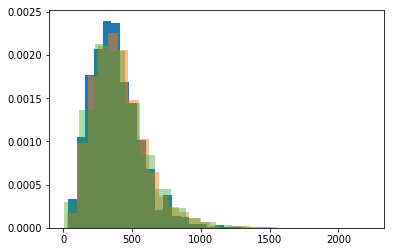

In [175]:
_ = plt.hist(vel_A, bins=20, density=True)
_ = plt.hist(vel_B, bins=20, alpha=0.5, density=True)
_ = plt.hist(vel_G, bins=20, alpha=0.4, density=True)

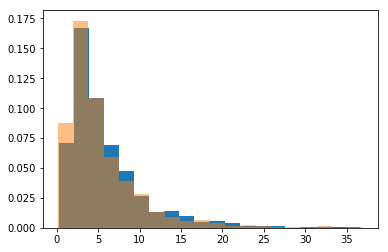

In [177]:
_ = plt.hist(delta_A, bins=20, density=True)
_ = plt.hist(delta_B, bins=20, alpha=0.5, density=True)

In [247]:
relative_pos = np.sqrt((galaxy_B['x']-galaxy_A['x'])**2+(galaxy_B['y']-galaxy_A['y'])**2+(galaxy_B['z']-galaxy_A['z'])**2)

relative_radial_vel = (galaxy_B['vx']-galaxy_A['vx'])*(galaxy_B['x']-galaxy_A['x'])+\
(galaxy_B['vy']-galaxy_A['vy'])*(galaxy_B['y']-galaxy_A['y'])+\
(galaxy_B['vz']-galaxy_A['vz'])*(galaxy_B['z']-galaxy_A['z'])

relative_radial_vel = relative_radial_vel/relative_pos
print(relative_pos.min()/0.678)

#kk = (galaxy_A['x']>10) & (galaxy_A['x']<710)
#kk &= (galaxy_A['y']>10) & (galaxy_A['y']<710)
#kk &= (galaxy_A['z']>10) & (galaxy_A['z']<710)
#kk = (galaxy_B['x']>10) & (galaxy_B['x']<710)
#kk &= (galaxy_B['y']>10) & (galaxy_B['y']<710)
#kk &= (galaxy_B['z']>10) & (galaxy_B['z']<710)

#ii = ((galaxy_A['MFOF']/0.68)<800) & ((galaxy_B['MFOF']/0.68)<800)
ii = ((galaxy_A['vmax'] < 240) & (galaxy_B['vmax']<240)) 
ii &= (relative_radial_vel < 0) #& (relative_radial_vel > -120)
ii &=  (relative_pos<1E4)  

jj = ((vel_B > 610)) & (relative_pos<1E4)  

ll = (vel_G > 610)  

print(np.count_nonzero(ii))
print(np.count_nonzero(jj))
print(np.count_nonzero(ll))

699.4389160961414
395
186
8800


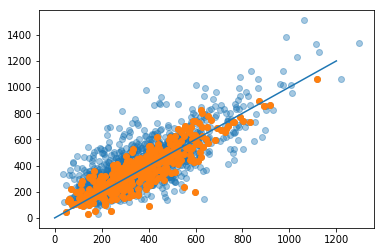

In [204]:
x=np.linspace(0,1200,10)
plt.scatter(vel_A, vel_B, alpha=0.4)
plt.scatter(vel_A[ii], vel_B[ii])
plt.plot(x,x)

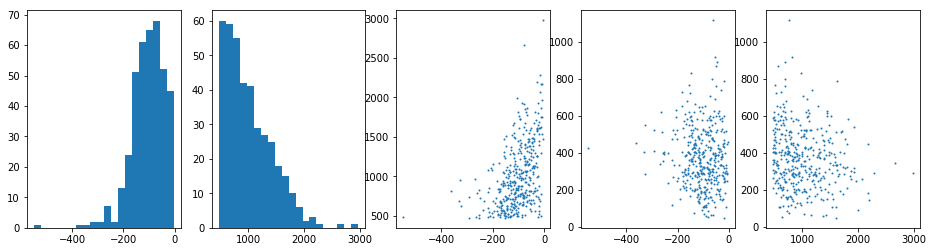

In [205]:
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
_ = plt.hist(relative_radial_vel[ii], bins=20)
plt.subplot(1,5,2)
_ = plt.hist(relative_pos[ii], bins=20)
plt.subplot(1,5,3)
plt.scatter(relative_radial_vel[ii], relative_pos[ii], s=1.0)

plt.subplot(1,5,4)
plt.scatter(relative_radial_vel[ii], vel_A[ii], s=1.0)

plt.subplot(1,5,5)
plt.scatter(relative_pos[ii], vel_A[ii], s=1.0)

1370


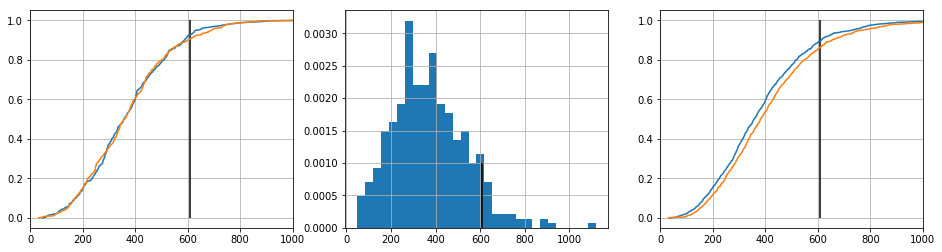

In [249]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sorted_vel_A = np.sort(vel_A[ii])
sorted_vel_B = np.sort(vel_B[ii])
integrated = np.linspace(0.0, 1.0, len(sorted_vel_A))
plt.plot(sorted_vel_A, integrated)
plt.plot(sorted_vel_B, integrated)
plt.vlines(610, 0, 1)
plt.xlim([0,1000])
plt.grid()

plt.subplot(1,3,2)
plt.hist(vel_A[ii], bins=30, density=True)
plt.vlines(610, 0, 1E-3)
plt.grid()

plt.subplot(1,3,3)
sorted_vel_A = np.sort(vel_A)
sorted_vel_B = np.sort(vel_B)
integrated = np.linspace(0.0, 1.0, len(sorted_vel_A))
print(len(sorted_vel_A))
plt.plot(sorted_vel_A, integrated)
plt.plot(sorted_vel_B, integrated)
plt.vlines(610, 0, 1)
plt.xlim([0,1000])
plt.grid()

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


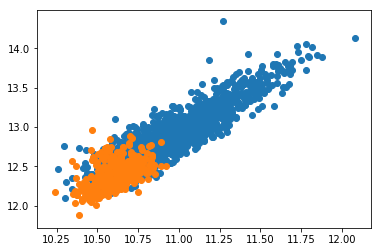

In [250]:
plt.scatter(np.log10(galaxy_A['Mstar']/0.68)+10, np.log10(galaxy_A['MFOF']/0.68)+10)
plt.scatter(np.log10(galaxy_B['Mstar'][ii]/0.68)+10, np.log10(galaxy_B['MFOF'][ii]/0.68)+10)
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

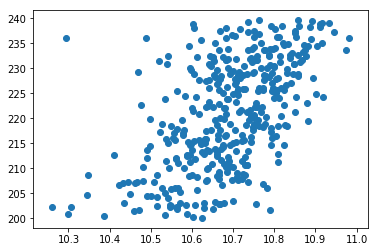

In [251]:
plt.scatter(np.log10(galaxy_A['Mstar'][ii]/0.68)+10, galaxy_A['vmax'][ii])

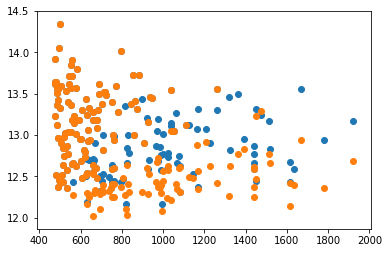

In [252]:
plt.scatter(relative_pos[jj], np.log10(galaxy_A['MFOF'][jj]/0.68)+10)
plt.scatter(relative_pos[jj], np.log10(galaxy_B['MFOF'][jj]/0.68)+10)

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


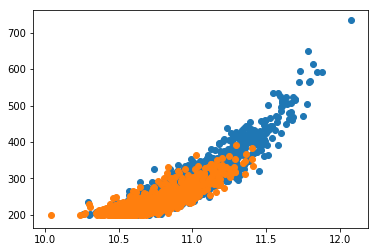

In [253]:
plt.scatter(np.log10(galaxy_A['Mstar']/0.68)+10, galaxy_A['vmax'])
plt.scatter(np.log10(galaxy_B['Mstar']/0.68)+10, galaxy_B['vmax'])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


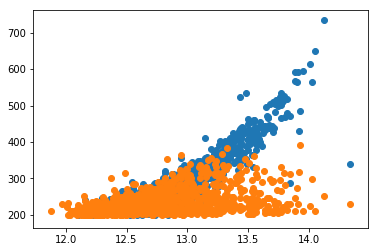

In [254]:
plt.scatter(np.log10(galaxy_A['MFOF']/0.68)+10, galaxy_A['vmax'])
plt.scatter(np.log10(galaxy_B['MFOF']/0.68)+10, galaxy_B['vmax'])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

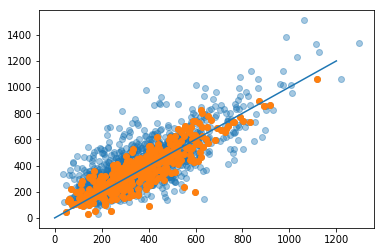

In [255]:
x=np.linspace(0,1200,10)
plt.scatter(vel_A, vel_B, alpha=0.4)
plt.scatter(vel_A[ii], vel_B[ii])
plt.plot(x,x)

[]

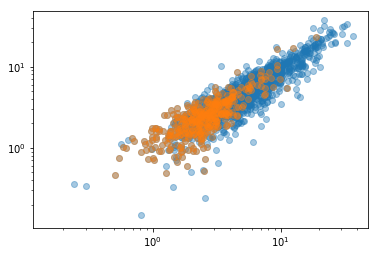

In [256]:
x=np.linspace(0,1200,10)
plt.scatter(delta_A, delta_B, alpha=0.4)
plt.scatter(delta_A[ii], delta_B[ii], alpha=0.4)
#plt.scatter(vel_A[ii], delta_A[ii], alpha=0.4)
plt.loglog()
#plt.scatter(vel_A[ii], vel_B[ii])
#plt.plot(x,x)

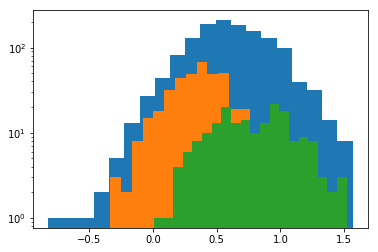

In [265]:
_ = plt.hist(np.log10(delta_B), log=True, bins=20)
_ = plt.hist(np.log10(delta_B[ii]), log=True, bins=20)
_ = plt.hist(np.log10(delta_B[jj]), log=True, bins=20)
#plt.scatter(vel_A[ii], vel_B[ii])
#plt.plot(x,x)

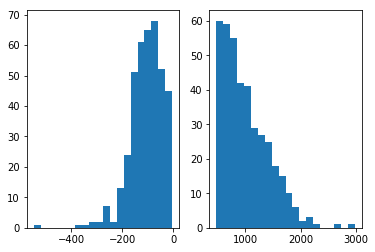

In [258]:
plt.subplot(1,2,1)
_ = plt.hist(relative_radial_vel[ii], bins=20)
plt.subplot(1,2,2)
_ = plt.hist(relative_pos[ii], bins=20)

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


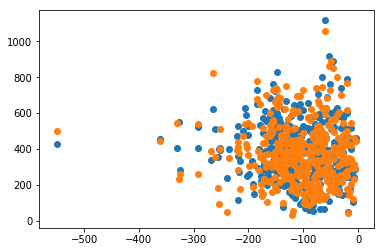

In [259]:
plt.scatter(relative_radial_vel[ii], vel_A[ii])
plt.scatter(relative_radial_vel[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


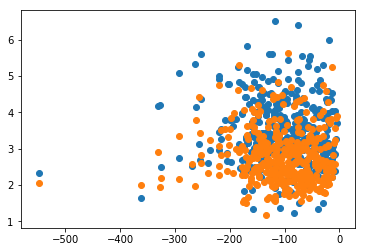

In [260]:
plt.scatter(relative_radial_vel[ii], galaxy_A['Mstar'][ii])
plt.scatter(relative_radial_vel[ii], galaxy_B['Mstar'][ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


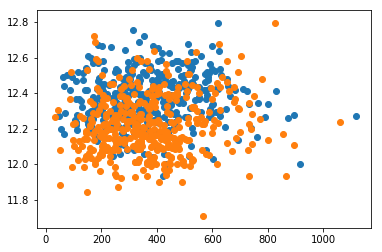

In [261]:
plt.scatter(vel_A[ii], np.log10(galaxy_A['MFOF'][ii])+10)
plt.scatter(vel_B[ii], np.log10(galaxy_B['MFOF'][ii])+10)
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

371.9038616026468 163.98942484995993
[205.17657941 358.50904038 526.3811029 ]


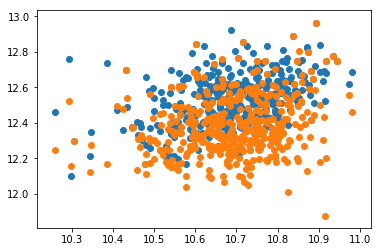

In [262]:
plt.scatter(np.log10(galaxy_A['Mstar'][ii]/0.68)+10, np.log10(galaxy_A['MFOF'][ii]/0.68)+10)
plt.scatter(np.log10(galaxy_A['Mstar'][ii]/0.68)+10, np.log10(galaxy_B['MFOF'][ii]/0.68)+10)
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

371.9038616026468 163.98942484995993


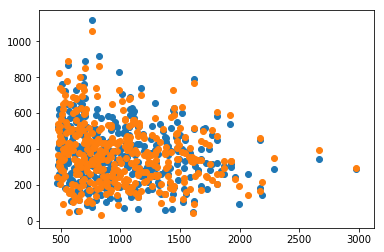

In [263]:
plt.scatter(relative_pos[ii], vel_A[ii])
plt.scatter(relative_pos[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))

In [264]:
print(np.count_nonzero(ii))

395


In [222]:
sorted_vmax_A = np.sort(galaxy_A['vmax'][jj])
sorted_vmax_B = np.sort(galaxy_B['vmax'][jj])
integrated = np.linspace(1.0, 0.0, len(sorted_vmax_A))

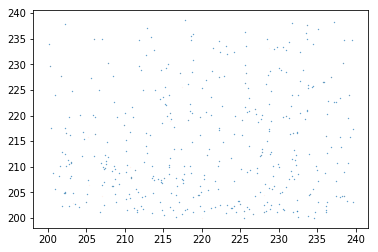

In [223]:
plt.scatter(galaxy_A['vmax'][ii], galaxy_B['vmax'][ii], alpha=1.0, s=0.1)
plt.scatter(galaxy_A['vmax'][jj], galaxy_B['vmax'][jj], alpha=0.1, s=0.1)

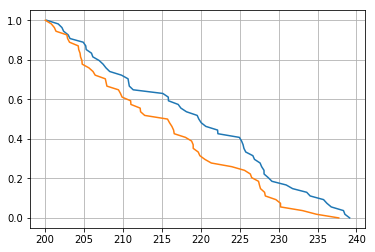

In [224]:
plt.plot(sorted_vmax_A, integrated)
plt.plot(sorted_vmax_B, integrated)
plt.grid()

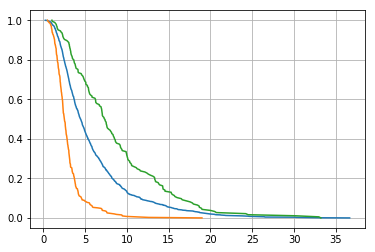

In [266]:

plt.plot(np.sort(delta_A), np.linspace(1.0, 0.0, len(delta_A)))
plt.plot(np.sort(delta_A[ii]), np.linspace(1.0, 0.0, len(delta_A[ii])))
plt.plot(np.sort(delta_A[jj]), np.linspace(1.0, 0.0, len(delta_A[jj])))

plt.grid()

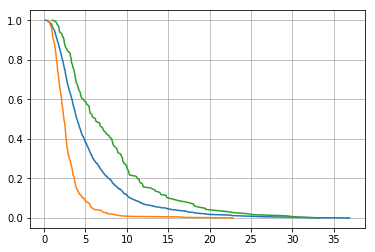

In [267]:
plt.plot(np.sort(delta_B), np.linspace(1.0, 0.0, len(delta_B)))
plt.plot(np.sort(delta_B[ii]), np.linspace(1.0, 0.0, len(delta_B[ii])))
plt.plot(np.sort(delta_B[jj]), np.linspace(1.0, 0.0, len(delta_B[jj])))

plt.grid()

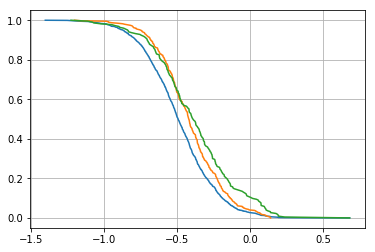

In [241]:
plt.plot(np.sort(alpha_B), np.linspace(1.0, 0.0, len(delta_B)))
plt.plot(np.sort(alpha_B[ii]), np.linspace(1.0, 0.0, len(delta_B[ii])))
plt.plot(np.sort(alpha_B[jj]), np.linspace(1.0, 0.0, len(delta_B[jj])))

plt.grid()

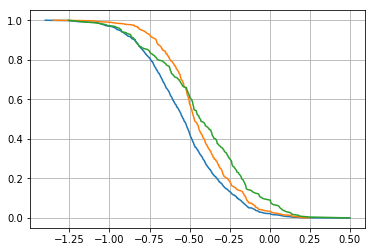

In [240]:
plt.plot(np.sort(alpha_A), np.linspace(1.0, 0.0, len(delta_B)))
plt.plot(np.sort(alpha_A[ii]), np.linspace(1.0, 0.0, len(delta_B[ii])))
plt.plot(np.sort(alpha_A[jj]), np.linspace(1.0, 0.0, len(delta_B[jj])))

plt.grid()

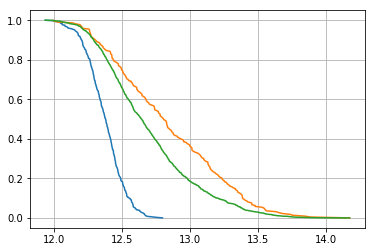

In [163]:
plt.plot(np.log10(np.sort(galaxy_A['MFOF'][ii]))+10, np.linspace(1.0, 0.0, len(galaxy_A[ii])))
plt.plot(np.log10(np.sort(galaxy_A['MFOF'][jj]))+10, np.linspace(1.0, 0.0, len(galaxy_A[jj])))
plt.plot(np.log10(np.sort(galaxy_A['MFOF']))+10, np.linspace(1.0, 0.0, len(galaxy_A)))

plt.grid()

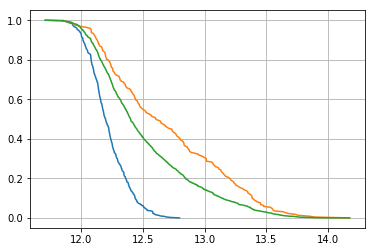

In [164]:
plt.plot(np.log10(np.sort(galaxy_B['MFOF'][ii]))+10, np.linspace(1.0, 0.0, len(galaxy_B[ii])))
plt.plot(np.log10(np.sort(galaxy_B['MFOF'][jj]))+10, np.linspace(1.0, 0.0, len(galaxy_B[jj])))
plt.plot(np.log10(np.sort(galaxy_B['MFOF']))+10, np.linspace(1.0, 0.0, len(galaxy_B)))

plt.grid()

59904 7849


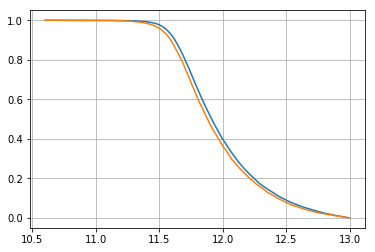

In [161]:
plt.plot(np.log10(np.sort(galaxy_G['MFOF']))+10, np.linspace(1.0, 0.0, len(galaxy_G)))
plt.plot(np.log10(np.sort(galaxy_G['MFOF'][ll]))+10, np.linspace(1.0, 0.0, len(galaxy_G[ll])))
plt.grid()
print(len(galaxy_G), len(galaxy_G[ll]))